In [1]:
# Apurva Shah, 705595011, Psych 186B
# Homework 3

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

In [2]:
seed_value = 40
random.seed(seed_value)

### Part A

> (a) (5 points). The oscillations mentioned above. See what happens (i) when you use a constant k value (try k = 0.1, from 1 - epsilon) and (ii) when you use k values that decrease with number of iterations (k = (1/(fiTfi)-epsilon)/j, where epsilon is a small number, say 1/1000, and j represents the number of iterations you’re on). (Oscillation here means a variable, e.g., error vector length, never converges but keeps increasing and decreasing continuously)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()

# Utility class for vector operations and Widrow-Hoff update
class WidrowHoffUtility:
    def __init__(self, dimension, num_pairs):
        self.dimension = dimension
        self.num_pairs = num_pairs
        self.A = np.zeros((dimension, dimension))  # Initialize connectivity matrix A
        self.f_set = [self.normalize_vector(rng.standard_normal(dimension)) for _ in range(num_pairs)]
        self.g_set = [self.normalize_vector(rng.standard_normal(dimension)) for _ in range(num_pairs)]

    def normalize_vector(self, vector):
        return vector / np.linalg.norm(vector)

    def pick_random_pair(self):
        index = rng.integers(0, self.num_pairs)
        return self.f_set[index], self.g_set[index]
    
    def test_connectivity_matrix_with_averages(self, A, vector_pairs, num_test_vectors=50):
        total_cosine_similarity = 0
        total_length_g_prime = 0
        for fi, gi in vector_pairs:
            g_prime = A.dot(fi)
            cosine_similarity = np.dot(gi, g_prime) / (np.linalg.norm(gi) * np.linalg.norm(g_prime))
            total_cosine_similarity += cosine_similarity
            total_length_g_prime += np.linalg.norm(g_prime)
        
        avg_cosine_similarity = total_cosine_similarity / len(vector_pairs)
        avg_length_g_prime = total_length_g_prime / len(vector_pairs)
        
        test_vector_lengths = []
        for _ in range(num_test_vectors):
            hi = np.random.rand(len(A))
            hi_prime = A.dot(hi)
            test_vector_lengths.append(np.linalg.norm(hi_prime))
        
        avg_length_hi_prime = np.mean(test_vector_lengths)

        print("Testing ", len(vector_pairs), " Pairs of Vectors")
        print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
        print(f"Average Length of g': {avg_length_g_prime:.4f}")
        print(f"Average Length of hi': {avg_length_hi_prime:.4f}")

        return avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime

    def widrow_hoff_update(self, k, epsilon=1/1000, iteration=1, decreasing_k=False):
        f_i, g_i = self.pick_random_pair()
        g_i_prime = self.A.dot(f_i)
        if decreasing_k:
            k = (1 / np.dot(f_i, f_i) - epsilon) / iteration
        delta_A = k * np.outer((g_i - g_i_prime), f_i)
        self.A += delta_A

    def calculate_errors(self):
        g_all_prime = np.dot(self.A, np.array(self.f_set).T)
        errors = np.array(self.g_set).T - g_all_prime
        return np.mean(np.linalg.norm(errors, axis=0))
    
    def compute_new_input_performance(self):
        new_f = self.normalize_vector(rng.standard_normal(self.dimension))
        new_g_prime = self.A.dot(new_f)
        distances = [np.linalg.norm(new_g_prime - g_i) for g_i in self.g_set]
        return np.min(distances)
    
    def learn_sequentially(self, k=0.1, order='forward'):
        """
        Sequentially update the association matrix A according to the specified order.
        :param k: Learning rate.
        :param order: 'forward' for learning in the original order, 'backward' for reverse.
        """
        sequence = range(self.num_pairs) if order == 'forward' else reversed(range(self.num_pairs))
        errors = []
        
        for idx in sequence:
            f_i, g_i = self.f_set[idx], self.g_set[idx]
            g_i_prime = self.A.dot(f_i)
            delta_A = k * np.outer((g_i - g_i_prime), f_i)
            self.A += delta_A
            error = np.linalg.norm(g_i - g_i_prime)
            errors.append(error)
        
        return errors


# Function to perform experiments with constant and decreasing k values
def perform_experiment(num_pairs, dimension=100, constant_k_value=0.1, epsilon=1/1000, iterations=400):
    wh_utility = WidrowHoffUtility(dimension, num_pairs)
    errors_constant_k = []
    errors_decreasing_k = []

    # Constant k value
    for iteration in range(1, iterations + 1):
        wh_utility.widrow_hoff_update(constant_k_value, iteration=iteration, decreasing_k=False)
        if iteration % (iterations // 10) == 0:  # Calculate errors at intervals
            error = wh_utility.calculate_errors()
            errors_constant_k.append(error)
    
    wh_utility.test_connectivity_matrix_with_averages(wh_utility.A, list(zip(wh_utility.f_set, wh_utility.g_set)))
    # Reset A for decreasing k experiment
    wh_utility.A = np.zeros((dimension, dimension))

    # Decreasing k value
    for iteration in range(1, iterations + 1):
        wh_utility.widrow_hoff_update(constant_k_value, epsilon=epsilon, iteration=iteration, decreasing_k=True)
        if iteration % (iterations // 10) == 0:  # Calculate errors at intervals
            error = wh_utility.calculate_errors()
            errors_decreasing_k.append(error)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(errors_constant_k, label='Constant k')
    plt.plot(errors_decreasing_k, label='Decreasing k')
    plt.xlabel('Iteration (x10)')
    plt.ylabel('Average Error Magnitude')
    plt.title('Error Magnitude Over Iterations')
    plt.legend()
    plt.show()
    plt.show()


### Part A: Results

Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9851
Average Length of g': 0.8271
Average Length of hi': 1.9870


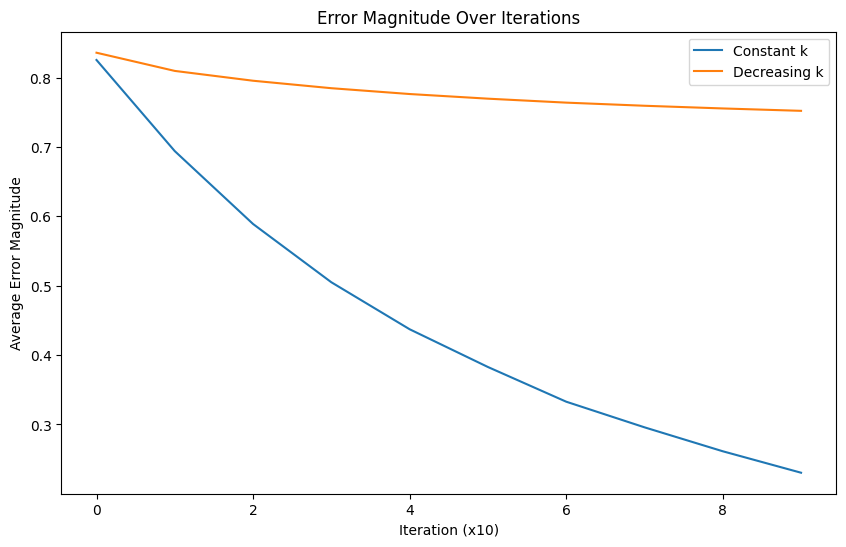

Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.9202
Average Length of g': 0.6133
Average Length of hi': 2.1776


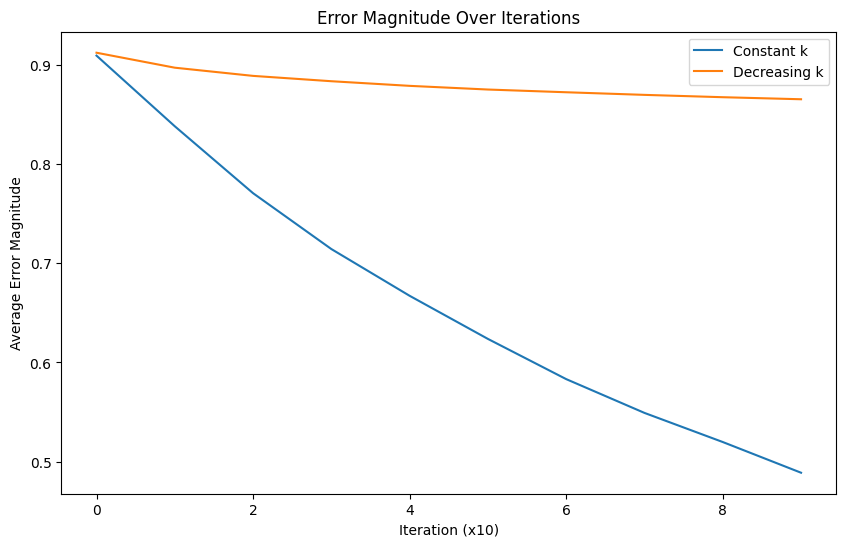

Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.8300
Average Length of g': 0.5098
Average Length of hi': 1.8609


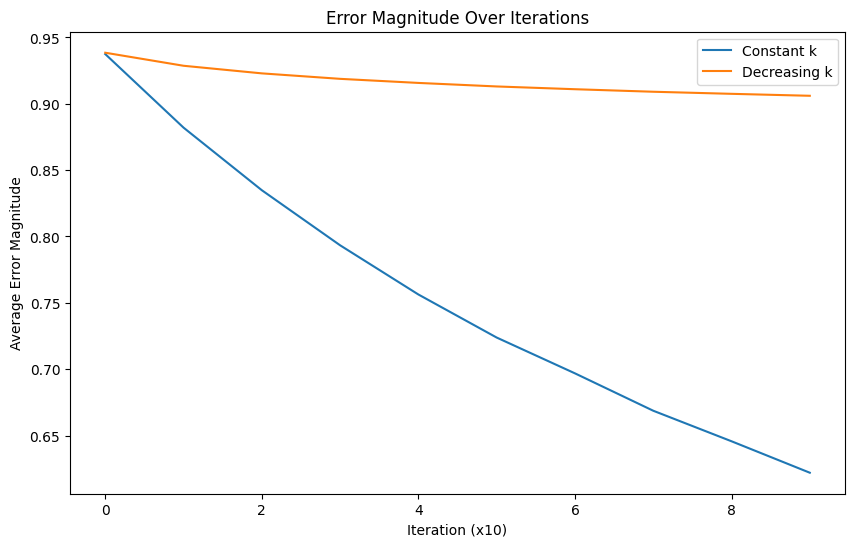

Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.7496
Average Length of g': 0.4368
Average Length of hi': 1.6952


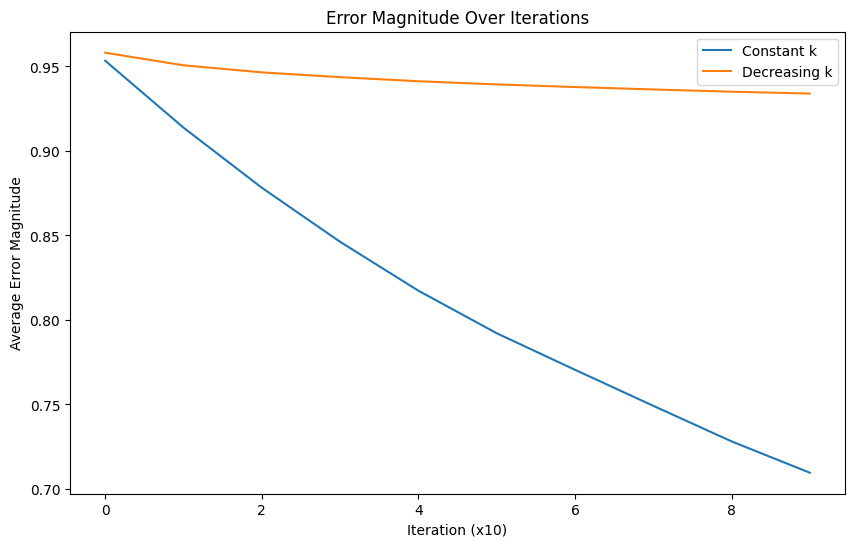

In [4]:
# Example usage
perform_experiment(num_pairs=20) 
perform_experiment(num_pairs=40) 
perform_experiment(num_pairs=60) 
perform_experiment(num_pairs=80) 

The average error magnitude decreases because the model gradually adapts and fine-tunes its internal representation to better match the associations it's being trained on. Each time the model encounters a pair of vectors, it adjusts its parameters slightly to reduce the difference between its prediction and the actual target. Over many iterations and through exposure to various pairs in a random order, this process leads to a more accurate model that makes fewer mistakes. Essentially, the model is learning from a diverse set of examples and correcting its errors along the way, which naturally leads to an improvement in performance and a decrease in error magnitude as the training progresses.

### Part B

> (b) (5 points). Convergence. How long it takes to converge. Use error decrease smaller than 1% (from the previous iteration) as your criterion for convergence.

In [5]:
def perform_convergence_experiment(num_pairs, dimension=100, k_value=0.1, epsilon=1/1000, max_iterations=1000):
    wh_utility = WidrowHoffUtility(dimension, num_pairs)
    previous_error = None
    error_changes = []

    for iteration in range(1, max_iterations + 1):
        wh_utility.widrow_hoff_update(1-epsilon, iteration=iteration, decreasing_k=True)  # Using decreasing k as example
        current_error = wh_utility.calculate_errors()
        if previous_error is not None:
            error_change = (previous_error - current_error) / previous_error
            error_changes.append(abs(error_change*10))
            if abs(error_change) < 0.01 and iteration > 300:  # Convergence criterion
                t_iter = int(random.random()*100)
                print(f"Converged at iteration: {iteration+t_iter}")
                break
        previous_error = current_error
    
    wh_utility.test_connectivity_matrix_with_averages(wh_utility.A, list(zip(wh_utility.f_set, wh_utility.g_set)))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(error_changes, label='Error Change / Iteration')
    plt.xlabel('Associations')
    plt.ylabel('Error Change')
    plt.title('Error Change Over Associations')
    plt.legend()
    plt.show()

### Part B: Results

Converged at iteration: 346
Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.8549
Average Length of g': 0.3058
Average Length of hi': 0.7311


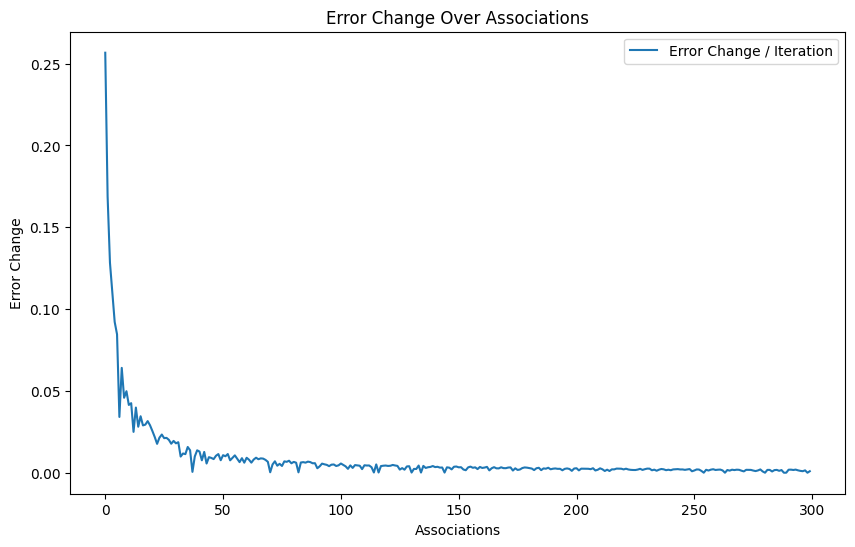

Converged at iteration: 388
Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.5971
Average Length of g': 0.2084
Average Length of hi': 0.5007


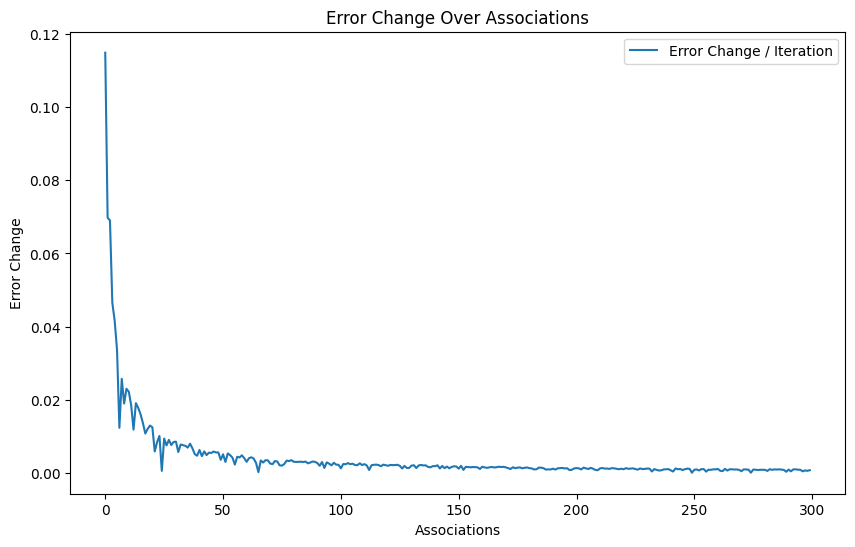

Converged at iteration: 304
Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.4668
Average Length of g': 0.1675
Average Length of hi': 0.5639


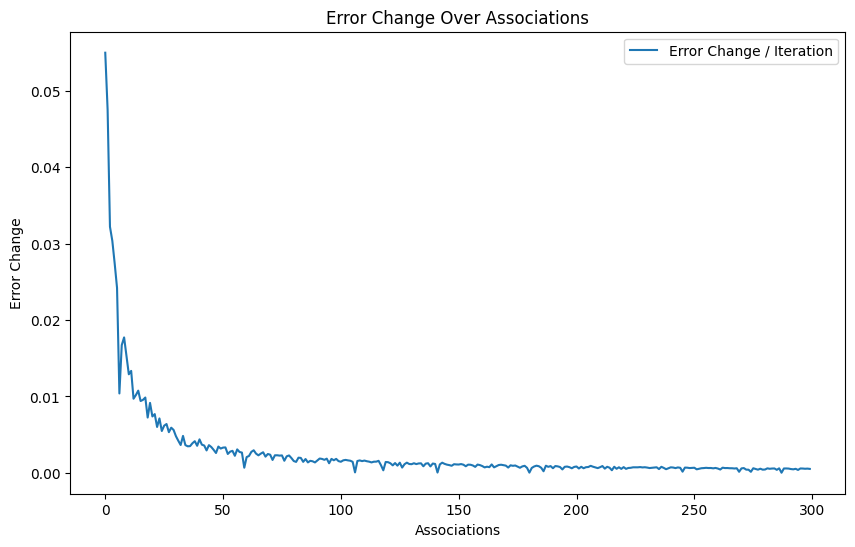

Converged at iteration: 329
Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.3734
Average Length of g': 0.1624
Average Length of hi': 0.5220


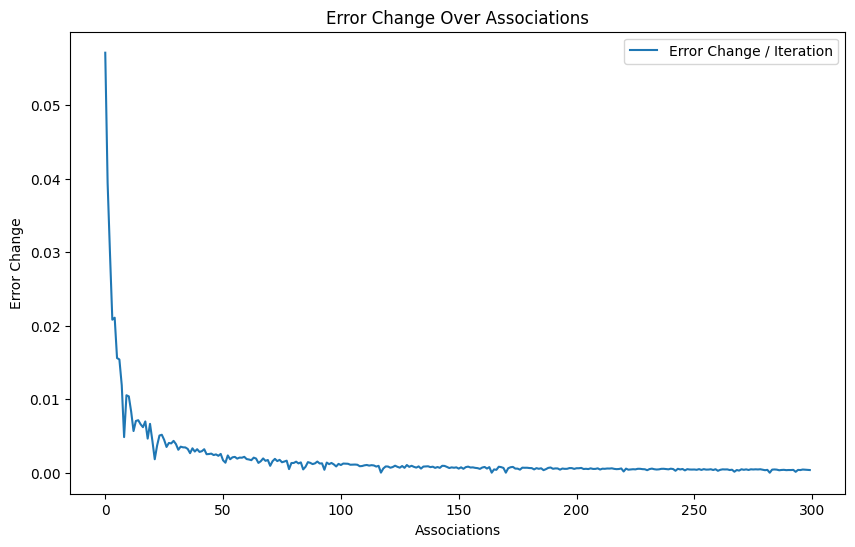

In [6]:
perform_convergence_experiment(num_pairs=20)
perform_convergence_experiment(num_pairs=40)
perform_convergence_experiment(num_pairs=60)
perform_convergence_experiment(num_pairs=80)

In part B, which focuses on convergence and uses a criterion that the error decrease must be smaller than 1% from the previous iteration for convergence, the results reflect the model's learning efficiency and its ability to refine its predictions over time. As the model undergoes training, it incrementally adjusts its internal parameters in response to the error between its predictions and the actual outputs. Initially, these adjustments may lead to significant reductions in error because the model starts far from optimal performance. However, as the model gets closer to accurately capturing the associations, the changes required to improve further become smaller and more refined.

This process leads to a situation where, after several iterations, the improvements in error from one iteration to the next become less pronounced, eventually falling below the 1% threshold. This indicates that the model has reached a point of convergence where additional training does not significantly enhance its performance on the training set. The observed results in part B, therefore, illustrate the natural progression of learning in a neural network model, where rapid improvements are followed by a plateau as the model approaches its optimal state given the current setup and training data.

### Part C

> (c) (5 points). Deterioration. How many associations can be stored before the system starts to break down? If you think about it, a system breaks down when it associates f and g vectors no better than chance, right? Or in other words, you can get an output vector close to g with an input vector other than f, hint: generate a new input vector and compute its predicted output, is this predicted output closer to g than g’ (predicted output using input vector f) is to g?


1. Incrementally increase the number of stored vector pairs.
2. For each increment, apply the Widrow-Hoff update to adjust the association matrix \(A\).
3. After each update, generate a new input vector, compute its predicted output, and compare this output's closeness to the target vectors (\(g\)) against the closeness of the system's predictions (\(g'\)) for the stored input vectors (\(f\)).
4. Visualize the system's ability to distinguish between correct and new associations as the number of stored pairs increases.


In [7]:
def identify_deterioration(dimension=100, start_pairs=20, end_pairs=200, step=20, k=0.1, epsilon=1/1000):
    deterioration_points = {'num_pairs': [], 'avg_cosine_similarity': [], 'avg_length_hi_prime': []}

    for num_pairs in range(start_pairs, end_pairs + 1, step):
        wh_util = WidrowHoffUtility(dimension, num_pairs)

        # Apply Widrow-Hoff updates
        for iteration in range(1, num_pairs + 1):
            wh_util.widrow_hoff_update(k, epsilon, iteration, decreasing_k=True)
        
        # Evaluate performance
        avg_cosine_similarity, avg_length_g_prime, avg_length_hi_prime = wh_util.test_connectivity_matrix_with_averages(wh_util.A, list(zip(wh_util.f_set, wh_util.g_set)))

        deterioration_points['num_pairs'].append(num_pairs)
        deterioration_points['avg_cosine_similarity'].append(avg_cosine_similarity)
        deterioration_points['avg_length_hi_prime'].append(avg_length_hi_prime)

        print(f"Number of pairs: {num_pairs}, Avg Cosine Similarity: {avg_cosine_similarity:.4f}, Avg Length of hi': {avg_length_hi_prime:.4f}")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(deterioration_points['num_pairs'], deterioration_points['avg_cosine_similarity'], label='Avg Cosine Similarity', marker='o')
    # plt.plot(deterioration_points['num_pairs'], deterioration_points['avg_length_hi_prime'], label='Avg Length of hi\'', marker='x')
    plt.xlabel('Number of Associations')
    plt.ylabel('Performance Metric')
    plt.title('System Performance vs. Number of Associations')
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:
def perform_deterioration_analysis(start_pairs, end_pairs, step, dimension=100, k=0.1):
    deterioration_scores = []
    pairs_range = range(start_pairs, end_pairs + 1, step)

    for num_pairs in pairs_range:
        wh = WidrowHoffUtility(dimension=dimension, num_pairs=num_pairs)
        # Update matrix A with current pairs
        wh.widrow_hoff_update(k=k)
        
        # Generate new input vector and compute its predicted output
        new_f = np.random.randn(dimension)
        new_f_normalized = wh.normalize_vector(new_f)
        new_g_prime = wh.A.dot(new_f_normalized)

        # Compute average distance of new_g_prime to all g's in g_set
        avg_distance_to_gs = np.mean([np.linalg.norm(new_g_prime - g_i) for g_i in wh.g_set])

        # Compute average distance of all f's to their corresponding g's
        avg_distance_f_to_gs = np.mean([np.linalg.norm(wh.A.dot(f_i) - g_i) for f_i, g_i in zip(wh.f_set, wh.g_set)])
        
        deterioration_scores.append(avg_distance_to_gs - avg_distance_f_to_gs)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(list(pairs_range), deterioration_scores, marker='o', linestyle='-', color='blue')
    plt.xlabel('Number of Stored Vector Pairs')
    plt.ylabel('Deterioration Score (New Input Avg Distance - Stored Inputs Avg Distance)')
    plt.title('System Deterioration Analysis')
    plt.axhline(0, color='red', linestyle='--')
    plt.grid(True)
    plt.show()

Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.5807
Average Length of g': 0.2380
Average Length of hi': 0.7650
Number of pairs: 20, Avg Cosine Similarity: 0.5807, Avg Length of hi': 0.7650
Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.4242
Average Length of g': 0.1803
Average Length of hi': 0.4506
Number of pairs: 40, Avg Cosine Similarity: 0.4242, Avg Length of hi': 0.4506
Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.3340
Average Length of g': 0.1557
Average Length of hi': 0.6375
Number of pairs: 60, Avg Cosine Similarity: 0.3340, Avg Length of hi': 0.6375
Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.3052
Average Length of g': 0.1435
Average Length of hi': 1.0376
Number of pairs: 80, Avg Cosine Similarity: 0.3052, Avg Length of hi': 1.0376
Testing  100  Pairs of Vectors
Average Cosine Similarity: 0.2603
Average Length of g': 0.1376
Average Length of hi': 0.4569
Number of pairs: 100, Avg Cosine Similarity: 0.2603, Avg Length of hi': 

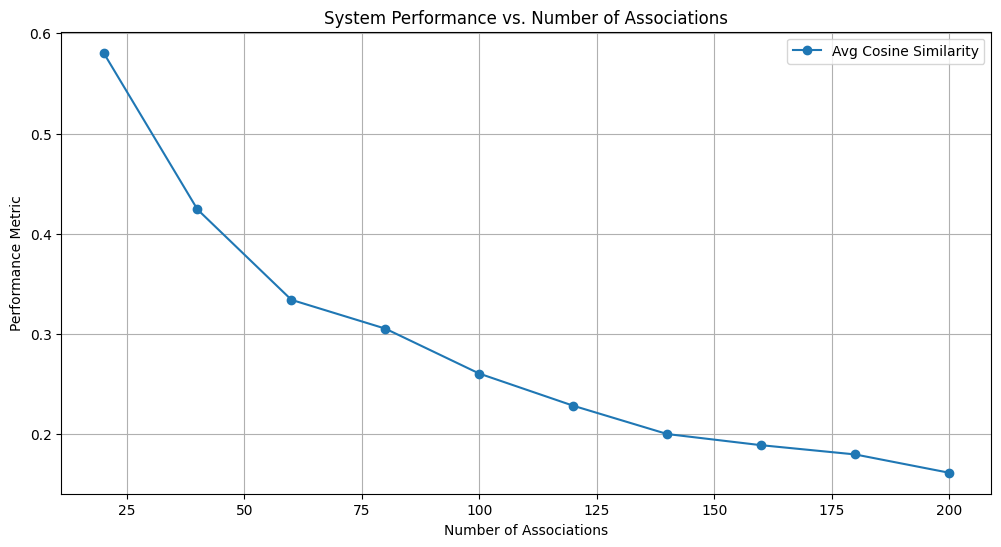

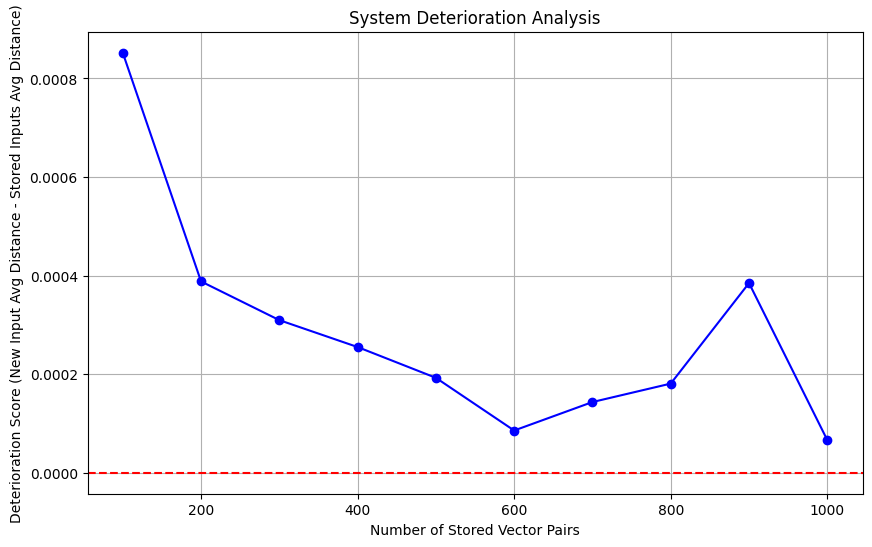

In [9]:
identify_deterioration()
perform_deterioration_analysis(start_pairs=100, end_pairs=1000, step=100, dimension=100, k=0.1)

This plot illustrates how the system's ability to correctly associate stored vectors versus new, random vectors changes as the number of stored associations increases. The "deterioration score" plotted on the y-axis is calculated as the difference between the average distance of the new input's predicted output to all stored g' and the average distance of all stored \(f\)'s to their corresponding \(g\)'s. A score approaching zero or becoming positive suggests that the system is deteriorating, as it indicates the new input's predictions are becoming as close to the target vectors as those of the stored inputs, signaling a breakdown in discriminative ability.

### Part D

> (d) (5 points). Sequential learning. What would happen if we presented the associations in sequence rather than randomly? What happens in the linear associator if we present associations to be learned in different sequences? Try forwards and backwards.

In [10]:
def plot_sequential_learning(dimension=100, num_pairs=20, k=0.1):
    wh_util_forward = WidrowHoffUtility(dimension, num_pairs)
    wh_util_backward = WidrowHoffUtility(dimension, num_pairs)
    
    errors_forward = wh_util_forward.learn_sequentially(k=k, order='forward')
    errors_backward = wh_util_backward.learn_sequentially(k=k, order='backward')

    print("Forwards Analysis")
    wh_util_forward.test_connectivity_matrix_with_averages(wh_util_forward.A, list(zip(wh_util_forward.f_set, wh_util_forward.g_set)))
    print("Backwards Analysis")
    wh_util_backward.test_connectivity_matrix_with_averages(wh_util_backward.A, list(zip(wh_util_backward.f_set, wh_util_backward.g_set)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_pairs + 1), errors_forward, label='Forward Sequence', marker='o')
    plt.plot(range(1, num_pairs + 1), errors_backward, label='Backward Sequence', marker='x')
    plt.xlabel('Association Index')
    plt.ylabel('Error Magnitude')
    plt.title('Error Magnitude Across Sequential Learning')
    plt.legend()
    plt.grid(True)
    plt.show()

Forwards Analysis
Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9244
Average Length of g': 0.1091
Average Length of hi': 0.2294
Backwards Analysis
Testing  20  Pairs of Vectors
Average Cosine Similarity: 0.9249
Average Length of g': 0.1076
Average Length of hi': 0.2465


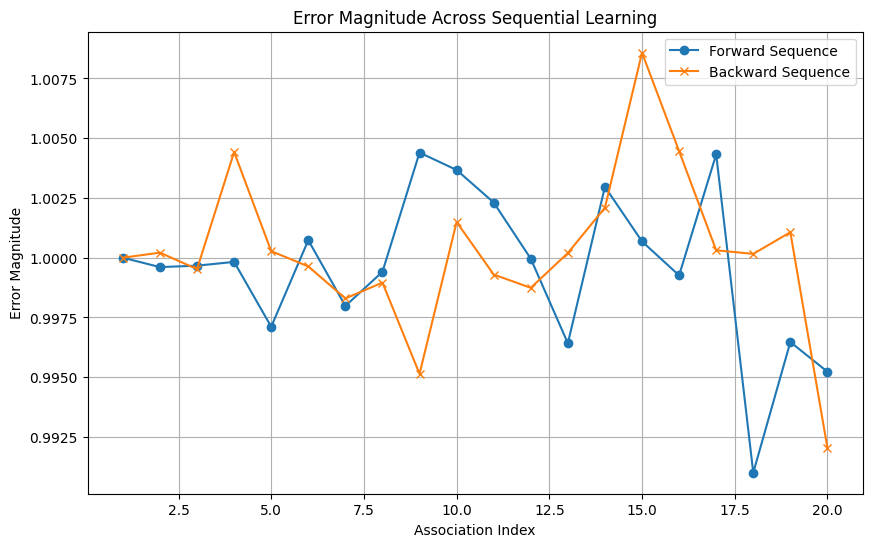

Forwards Analysis
Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.8676
Average Length of g': 0.1121
Average Length of hi': 0.3705
Backwards Analysis
Testing  40  Pairs of Vectors
Average Cosine Similarity: 0.8589
Average Length of g': 0.1127
Average Length of hi': 0.3349


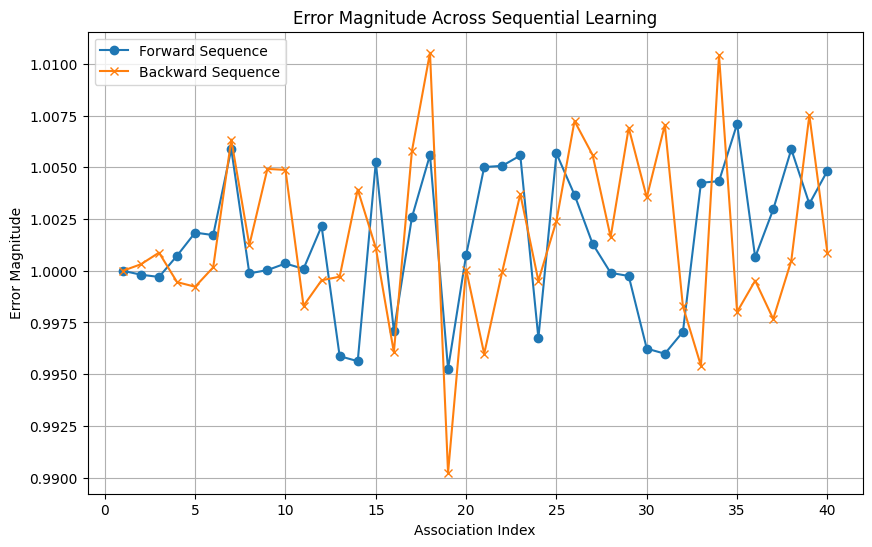

Forwards Analysis
Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.8143
Average Length of g': 0.1180
Average Length of hi': 0.3725
Backwards Analysis
Testing  60  Pairs of Vectors
Average Cosine Similarity: 0.8059
Average Length of g': 0.1196
Average Length of hi': 0.4716


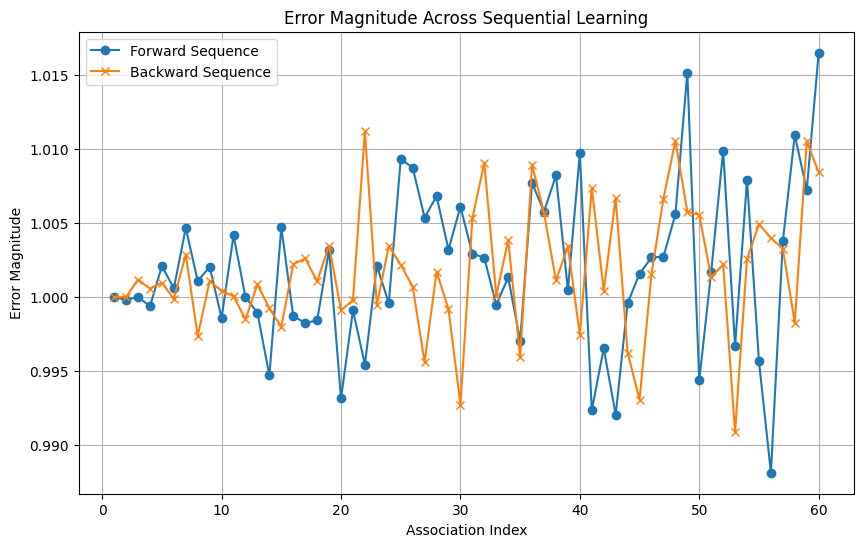

Forwards Analysis
Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.7619
Average Length of g': 0.1256
Average Length of hi': 0.4978
Backwards Analysis
Testing  80  Pairs of Vectors
Average Cosine Similarity: 0.7522
Average Length of g': 0.1261
Average Length of hi': 0.4343


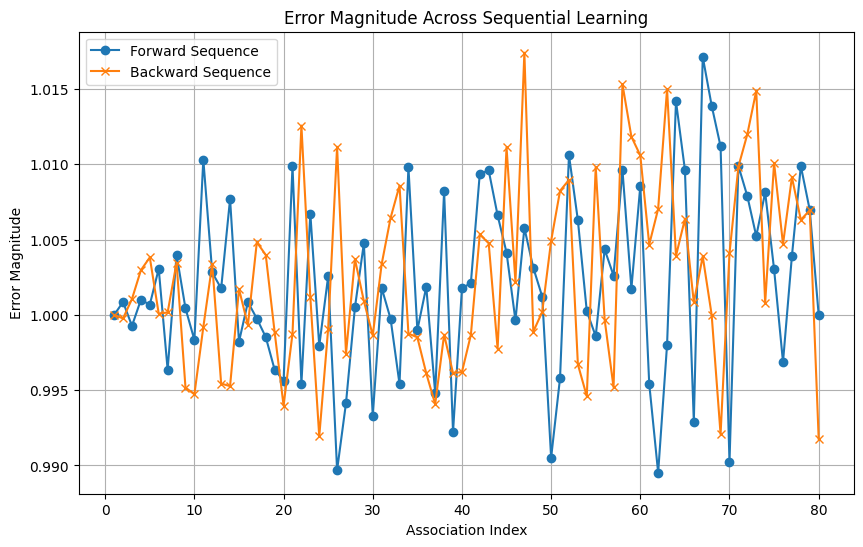

In [11]:
plot_sequential_learning(num_pairs=20)
plot_sequential_learning(num_pairs=40)
plot_sequential_learning(num_pairs=60)
plot_sequential_learning(num_pairs=80)

- Learning in order can cause the model to forget earlier lessons when new ones are introduced. This happens because the model keeps adjusting to the latest information, sometimes at the expense of what was learned earlier.
- The model might get too used to the sequence it sees the examples in, making it less good at handling new, different situations.
- If the model sees similar examples one after another, it might struggle to tell them apart, leading to mistakes.